<a href="https://colab.research.google.com/github/mkjubran/ENCS5141-INTELLIGENT-SYSTEMS-LAB/blob/main/ENCS5141_Exp2_Handling_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment #2: Data Visualization and Data Cleaning

This experiment focuses on discussing concepts and implementing code snippets to demonstrate various techniques used for data cleaning as part of an Exploratory Data Analysis (EDA). EDA plays a crucial role in comprehending and examining datasets. Throughout the experiment, you will also need to solve a few exercises to demonstrate your comprehension and acquire the necessary skills. The topics tha will be discussed in the experiment are
##2.1. Data Visualization
2.1.1 Using matplotlib package \\
2.1.2 Using seaborn package \\
2.1.3 Boxplot \\
##2.2. Handling Missing Data
2.2.1 Missing numeric data \\
2.2.2 Missing Categorical data \\
##3. Handling Outliers
2.3.1 Statistical outlier detection using z-score \\
2.3.2 Using the interquartile range and boxplots \\

---


##2.1. Data Visualization
###2.1.1 Using matplotlib package
Matplotlib package is an open source library that is used to create professional figures and plots. To make a plot, you need first to import the **pyplot** sub-module and then use the **plot** method with proper arguments.


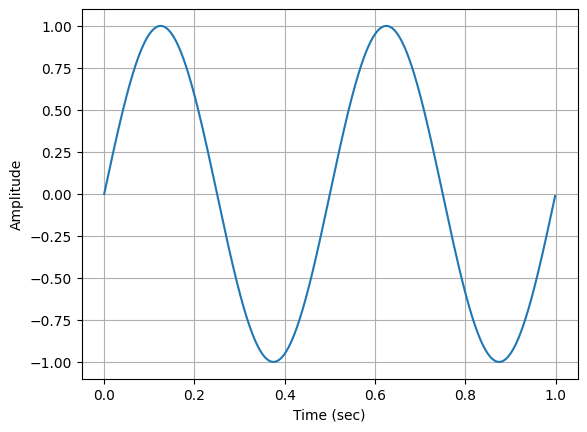

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# generating a sinwwave signal
t = np.arange(0, 1, 0.001)
sig = np.sin(2 * np.pi * 2 * t)

plt.plot(t,sig)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.show()

The Matplotlib package can also be used to plot multiple axes in the same figure or two curves on the same axis.

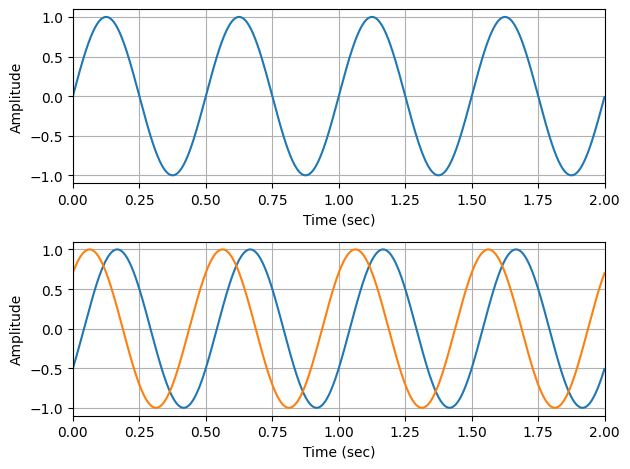

In [2]:
# generating two sinwwave signals
t = np.arange(0, 2, 0.001)
sig1 = np.sin(2 * np.pi * 2 * t)
sig2 = np.sin(2 * np.pi * 2 * t - np.pi/6)
sig3 = np.sin(2 * np.pi * 2 * t + np.pi/4)

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, sig1)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time (sec)')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

axs[1].plot(t, sig2, t, sig3)
axs[1].set_xlim(0, 2)
axs[1].set_xlabel('Time (sec)')
axs[1].set_ylabel('Amplitude')
axs[1].grid(True)

fig.tight_layout()
plt.show()

**Task 2.1**: Refer to the matplot documentation at https://matplotlib.org/stable/gallery/color/named_colors.html to plot two curves in the same figure, add markers of specific size, add a legend, and add a figure title.

In [3]:
#write you code here


**Task 2.2**: Create two axes next to each other, and plot a sinwave in one axis and a cosine wave on the other. Add markers, legend, and a title for the figure.

In [4]:
#write you code here



###2.1.1 Using seaborn package
Seaborn is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. To make a plot, you need first to import the **sns** sub-module and then use a specific method with proper arguments. For example you may use the **relplot** method to create relational plots.

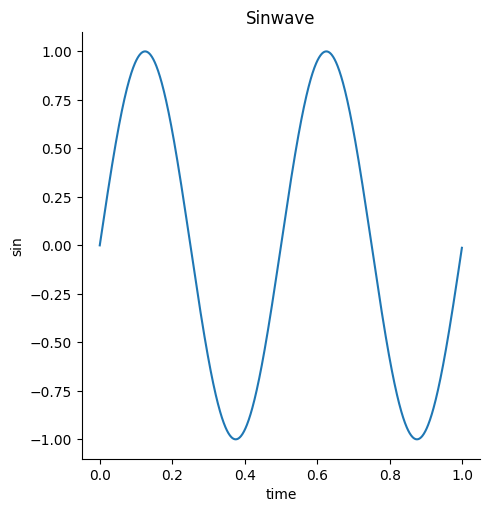

In [5]:
import seaborn as sns
import pandas as pd

# generating a sinwwave signal
t = np.arange(0, 1, 0.001)
sin = np.sin(2 * np.pi * 2 * t)
cos = np.cos(2 * np.pi * 2 * t)

#Creating a dataframe from the time, sin, and cos curves
df = pd.DataFrame({'time':t, 'sin':sin, 'cos':cos})

# Create a visualization
sns.relplot(data=df,kind="line",x="time",y="sin").set(title='Sinwave')

You can also use the **replot** function to create more advanced visualizations of your data. For instance, let's take the "tips" dataset as an example. This dataset contains information about tips received by a waiter over a few months in a restaurant. It has details like how much tip was given, the bill amount, whether the person paying the bill is male or female, if there were smokers in the group, the day of the week, the time of day, and the size of the group. To import the dataset use the following code.

In [6]:
# Load an example dataset
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Execute the following code to view the first 10 rows in the dataset

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Using the **relplot()** method helps us understand patterns in the dataset how different factors might be connected.

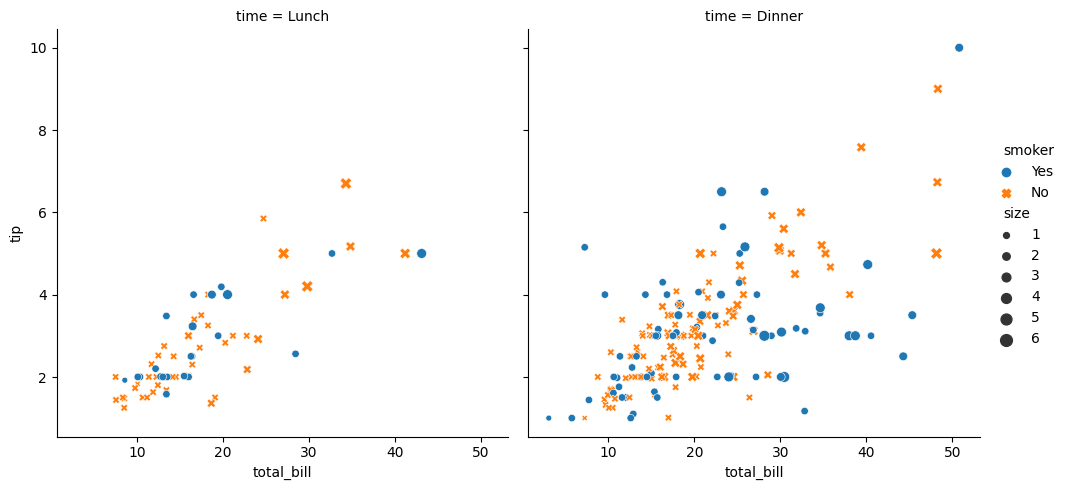

In [8]:
# Create a visualization
sns.relplot(data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

From observing the visualization of the tips dataset, we can infer that as the total bill size grows, the tip value tends to increase proportionally. Additionally, it's apparent that both the total bill and tip value are higher when the group size is larger.

**Task 2.3**: Load a dataset from the sns repository and then use the relplot() method to visualize the dataset and understand patterns in the dataset. You may list the datasets in the sns repository using the sns.get_dataset_names() method.

In [9]:
#write you code here


The **histplot()** is another method that can be used to plot univariate or bivariate histograms to show distributions of datasets.

<Axes: xlabel='tip', ylabel='Count'>

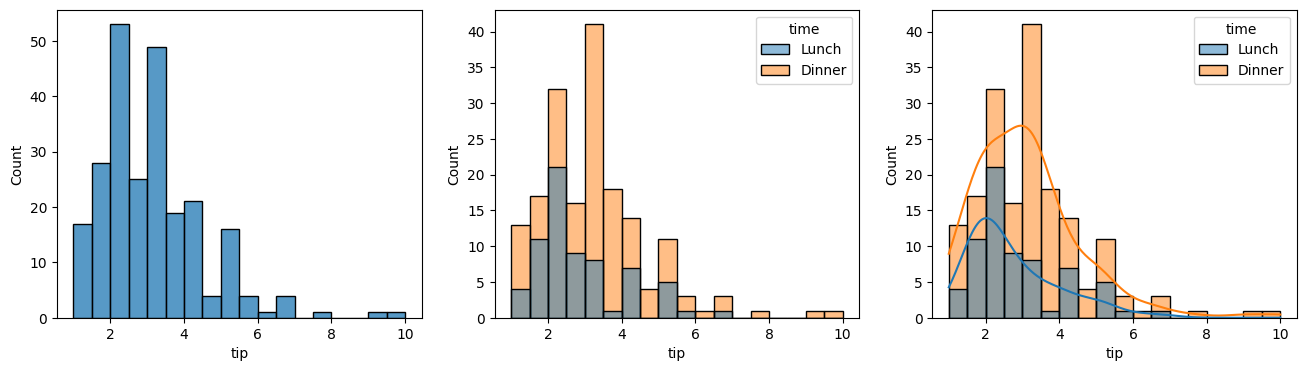

In [10]:
fig, axs = plt.subplots(figsize=(16, 4),ncols=3)

#Create histograms displaying the distribution of tip values
sns.histplot(data=tips, x="tip", ax=axs[0])

#Create histograms displaying the distribution of tip values based on the time of day
sns.histplot(data=tips, x="tip", hue="time",ax=axs[1])

#Create histograms displaying the distribution of tip values based on the time of day, and incorporate the actual distribution curve.
sns.histplot(data=tips, x="tip", hue="time",ax=axs[2], kde=True)

**Task 2.4**: Create a histogram plot for the dataset you loaded in task 2.3 and incorporate the actual distribution curve.

In [11]:
#write you code here


## EXPLORATORY DATA ANALYSIS – DATA CLEANING

In this notebook, we will demonstrate Data Cleaning as part of Exploratory Data Analysis (EDA). We will work on a modified version of the cardiovascular dataset from Kaggle (https://www.kaggle.com/code/sulianova/eda-cardiovascular-data/data). The dataset consists of 70000 records of patient data in 12 features. The target class "cardio" equals 1, when a patient has cardiovascular disease, and it's 0 if a patient is healthy.

# Import Libraries

First, we need to import some libraries that will be used during data cleaning.

In [12]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt

# Data Preparation

***Clone the dataset Repository***

The modified dataset can be cloned from the GitHub repository https://github.com/mkjubran/AIData.git as below

In [13]:
!rm -rf ./AIData
!git clone https://github.com/mkjubran/AIData.git

Cloning into 'AIData'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78
Receiving objects: 100% (78/78), 43.92 MiB | 5.77 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Updating files: 100% (23/23), done.


***Read the dataset***

The data is stored in the cardio_train.csv file. Read the input data into a dataframe using the Pandas library (https://pandas.pydata.org/) to read the data.

In [14]:
df = pd.read_csv("/content/AIData/cardio_train_modified.csv",sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.0,18393.0,male,168.0,62.0,110.0,80.0,1.0,1.0,No,0.0,1.0,0.0
1,1.0,20228.0,female,156.0,85.0,140.0,90.0,3.0,1.0,No,0.0,1.0,1.0
2,2.0,18857.0,female,165.0,64.0,130.0,70.0,3.0,1.0,No,0.0,0.0,1.0
3,3.0,17623.0,male,169.0,82.0,150.0,100.0,1.0,1.0,No,0.0,1.0,1.0
4,4.0,17474.0,female,156.0,56.0,100.0,60.0,1.0,1.0,No,0.0,0.0,0.0


***Display Data Info and Check NAN***

To display the content of the data and type of features use the info() method

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69997 non-null  float64
 1   age          69997 non-null  float64
 2   gender       69008 non-null  object 
 3   height       68996 non-null  float64
 4   weight       69993 non-null  float64
 5   ap_hi        69992 non-null  float64
 6   ap_lo        69991 non-null  float64
 7   cholesterol  69398 non-null  float64
 8   gluc         69995 non-null  float64
 9   smoke        69003 non-null  object 
 10  alco         69997 non-null  float64
 11  active       69997 non-null  float64
 12  cardio       69997 non-null  float64
dtypes: float64(11), object(2)
memory usage: 6.9+ MB


Here the dataframe consists of 70000 rows with 12 variables (features). Ten features are numerical and two features are objects (gender, smoke). We notice that for some of the features the number of non-null values does not equal 70000 which means that some feature values in the data are missing.

We can get the exact number of missing values for each feature using the isnull() method as below

In [16]:
df.isnull().sum()

id                3
age               3
gender          992
height         1004
weight            7
ap_hi             8
ap_lo             9
cholesterol     602
gluc              5
smoke           997
alco              3
active            3
cardio            3
dtype: int64

We can also get the number and percentage of patients' records that has one or more missing values

In [ ]:
print(df.isnull().any(axis=1).sum())
print(100*df.isnull().any(axis=1).sum()/df.shape[0],'%')

3530

To display the records with NAN values

In [ ]:
df[df.isnull().any(axis=1)]

# Data Cleaning

**Data Cleaning: drop all empty records**

The first step is usually to drop all empty records. I.e. records with all features are NaN.

In [ ]:
df.dropna(how='all', inplace=True)
df.isnull().sum()

By comparing the number of NaN features before and after the last step, we notice that there were 3 empty records in the dataset. We notice also that the number of missing values for the features 'weight', 'ap_hi', ap_lo', and 'gluc' is very low. So the best choice is to delete these patients' records from the dataset.

**Data Cleaning: target feature (class, label)**

The target feature (class, label) "cardio" equals 1, when a patient has cardiovascular disease, and it's 0 if a patient is healthy. Notice that this feature 'cardio' does not have any missing data. Had there been any missing values in the target feature, then the corresponding patient records must be dropped.

In [ ]:
print(df.shape)
df.dropna(subset=['cardio'], inplace=True)
print(df.shape)

As expected no record is dropped.

**Data Cleaning: 'weight' feature**

List the patients' records with 'weight' feature is NaN

In [ ]:
df[df.weight.isnull()]

List the patients' records with 'weight' feature is not NaN

In [ ]:
df[df.weight.notna()]

Delete (drop) records with 'weight' feature is NaN be selecting only rows with weight does not equal to NaN.

In [ ]:
print(df.shape)
df.dropna(subset=['weight'], inplace=True)
print(df.shape)

In [ ]:
df.isnull().sum()

As can be observed the number of records in the data frame was reduced by 4 (69996) and there is no NAN value in the 'weight' feature

**Data Cleaning: 'ap_hi', ap_lo', and 'gluc' features**

We will do the same for the 'ap_hi', ap_lo', and 'gluc' features.

In [ ]:
print(df.shape)
df.dropna(subset=['ap_hi','ap_lo','gluc'], inplace=True)
print(df.shape)

In [ ]:
df.isnull().sum()

**Data Cleaning: 'gender' feature**

The gender feature is a string 'male, female' and we have many missing values. One option is to drop all records with 'gender' feature equals to 'NaN'. However this means dropping ~1.4% of the records and this is to be decided by the domain experts.

In [ ]:
dfgender = df.copy()
print(dfgender.isnull()['gender'].sum())
print(100*dfgender.isnull()['gender'].sum()/dfgender.shape[0],'%')
print(dfgender.shape)
dfgender.dropna(subset=['gender'], inplace=True)
print(dfgender.shape)

Another option is to replace all missing values in the 'gender' feature with the majority kind (male or female).

In [ ]:
df['gender'].value_counts()

In [ ]:
dfc = df.copy()
dfc['gender'].fillna(value='female', inplace=True)
dfc['gender'].value_counts()

As can be observed the number of female records increased.

A third option is to try to set the missing 'gender' feature values based on other values in the record. For example, we can check the correlation between 'gender' and 'height' features.

In [ ]:
df[['gender','height']].apply(lambda x: x.factorize()[0]).corr()

It seems that there is not much correlation. Let us try to check with other features.

In [ ]:
df.apply(lambda x: x.factorize()[0]).corr()

It seems that the 'gender' feature has the highest correlation with the 'smoke' feature.

In [ ]:
df[['gender','smoke']].apply(lambda x: x.factorize()[0]).corr()

Let us explore the correlation using crosstab

In [ ]:
pd.crosstab(df['gender'],df['smoke'])

This implies that most non-smokers are females and most smokers are males in the dataset. So let us make all 'gender' feature with 'NaN values for smokers to be 'male', and all 'gender' feature with 'NaN values for non-smokers to be 'female'.

In [ ]:
dfsmoke = df.copy()
dfsmoke.loc[(dfsmoke.gender.isnull()) & (dfsmoke['smoke'] == 'Yes'),'gender']='male'
dfsmoke.loc[(dfsmoke.gender.isnull()) & (dfsmoke['smoke'] == 'No'),'gender']='female'

Let us check the correlation using crosstab again.

In [ ]:
pd.crosstab(dfsmoke['gender'],dfsmoke['smoke'])

We observe that the number of female non-smokers increased and the male smokers increase also. We also need to check if there are still any 'NaN' values in the 'gender' feature. This could be because the 'smoke' feature has also NaN values.

In [ ]:
dfsmoke.isnull().sum()

There are 12 NaN values in the 'gender' feature. We will drop them because they make only very small percentage of the population (records in the dataset).

In [ ]:
print(dfsmoke.shape)
dfsmoke.dropna(subset=['gender'], inplace=True)
print(dfsmoke.shape)

In this notebook, we will consider the third option to deal with the 'NaN' values in the 'gender' feature.

In [ ]:
df = dfsmoke.copy()
df.isnull().sum()

**Data Cleaning: 'smoke' feature**

Let us now handle the missing vlues of the 'smoke' feature. This feature takes only two values 'Yes' and 'No'. Is there any correlation with the other features?

In [ ]:
df.apply(lambda x: x.factorize()[0]).corr()

Yes, there is a high correlation between the 'smoke' feature and both the 'gender' and 'alco' features. But since we already used the 'smoke' feature to deal with the NaN values in the 'gender' feature and thus the correlation between them might be affected, we will use the 'alco' feature to deal with the NaN values in the 'smoke' feature.

In [ ]:
pd.crosstab(df['smoke'],df['alco'])

We can observe from the crosstab results that most non-alcoholic persons in the dataset are non-smokers but alcoholic persons might or might not be smokers. So we will make all 'NaN' values in the 'smoke' feature for all records of non-alcoholic persons to be No.

In [ ]:
df.loc[(df.smoke.isnull()) & (df['alco'] == 0.0),'smoke']='No'

Let us check the correlation using crosstab again.

In [ ]:
pd.crosstab(df['smoke'],df['alco'])

We observe that the number of non-alcoholic persons in the dataset is non-smokers increased. Let us know check the status of the missing values.

In [ ]:
df.isnull().sum()

As the number of remaining missing values of the 'smoke' feature is small, we will drop all other records with the 'smoke' feature equal to NaN.

In [ ]:
print(df.shape)
df.dropna(subset=['smoke'], inplace=True)
print(df.shape)
df.isnull().sum()

**Data Cleaning: 'cholesterol' feature**

Let us now handle the missing vlues of the 'cholesterol' feature. This feature takes three values.

In [ ]:
df.cholesterol.unique()

 Is there any correlation with the other features?

In [ ]:
df.apply(lambda x: x.factorize()[0]).corr()

Yes, there is a high correlation between the 'alco' feature and the 'gluc' feature. Let us explore the correlation using crosstab.

In [ ]:
(pd.crosstab(df['cholesterol'],df['gluc'])/pd.crosstab(df['cholesterol'],df['gluc']).sum())*100

We observe that 81% of the persons with a 'gluc' value of 1.0 has also a 'cholesterol' value of 1.0. We also observe that 65% of the persons with a 'gluc' value of 3.0 has also a 'cholesterol' value of 3.0. And thus we will use these two notes to handle missing values of the 'cholesterol' feature. However, for the persons with a 'gluc' value of 2.0, 43% and 46% have 'cholesterol values of 1.0 and 2.0 which imply that we can not use the 'gluc' value for these persons to handle missing 'cholesterol' values.

In [ ]:
df.loc[(df.cholesterol.isnull()) & (df['gluc'] == 1.0),'cholesterol']=1.0
df.loc[(df.cholesterol.isnull()) & (df['gluc'] == 3.0),'cholesterol']=3.0

Let us now check the status of missing values

In [ ]:
df.isnull().sum()

As the number of missing values in the 'cholesterol' feature is reduced to 39. Then we will remove these records from the dataset.

In [ ]:
print(df.shape)
df.dropna(subset=['cholesterol'], inplace=True)
print(df.shape)
df.isnull().sum()

**Data Cleaning: 'height' feature**

Now, for the 'height' feature, is there any correlation with the other features?

In [ ]:
df.apply(lambda x: x.factorize()[0]).corr()

Yes, there is a high correlation between the 'height' feature and both the 'gender' and 'weight' features. However, the 'height' feature has a continuous value and we can not deal with it similar to the 'gender' feature'. Instead, we should create a model that predicts the 'height' feature based on the 'gender' and 'weight' features which we will study in the next modules. So, for now, we have two options, either to drop all records where the 'height' feature is NaN or replace all these NaN values with some statistical measure (mean, median) of the 'height' feature. In this notebook, we will replace the NaN values with the median of the values in the 'height' feature.

In [ ]:
print(df.height.median())
df['height'].fillna(df.height.median(), inplace=True)
print(df.height.median())
df.isnull().sum()


# Remove Outliers

Let us have a close look at the statistical properties of the numaric features

In [ ]:
df.describe()

Usually, the 'id' feature will not have outliers, so let us check the 'age' feature. According to the description of the dataset, the age is in days. Let us convert the Age into years so that it is easier to understand and interpret.

In [ ]:
df['age_years'] = (df['age'] / 365).round().astype('int')
df.head()

Let us have a close look again at the statistical properties of the numaric features

In [ ]:
df.describe()

The minimum age in the datset is about 30 years, the maximum is about 65 years, and the average is about 53.33 years.

**Remove Outliers: 'height' and 'weight' feature**

Next, let us examine the 'height' feature, the minimum height is 55cm which is too short for the records of persons with a minimum age of 30. Similarly, the maximum height is 250cms which is too rare value for a person's height. So there must be an error in the height feature. Let us also examine the 'weight' feature. The minimum weight is 10 kg which is too low for the records of persons with a minimum age of 30. So again, there must be an error in the 'weight' feature. Let us get the box plot of these two features.

In [ ]:
rcParams['figure.figsize'] = 10, 6
df.boxplot(column=['height', 'weight'])

As can be observed there are outliers, so let us remove weights and heights, that fall below 5% or above 95% of a given range.

In [ ]:
df.drop(df[(df['height'] > df['height'].quantile(0.95)) | (df['height'] < df['height'].quantile(0.05))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.95)) | (df['weight'] < df['weight'].quantile(0.05))].index,inplace=True)

Let us get the box plot of these two features again.

In [ ]:
rcParams['figure.figsize'] = 10, 6
df.boxplot(column=['height', 'weight'])

As can be observed, the outliers for the 'height' and 'weight' features are removed.

**Remove Outliers: 'ap_hi' and 'ap_lo' feature**

Similarly, we will do the same for the 'ap_hi' and 'ap_lo' features especially since the blood pressure can not be negative. Below is the box plot for the 'ap_hi' and 'ap_lo' features.

In [ ]:
rcParams['figure.figsize'] = 10, 6
df.boxplot(column=['ap_hi', 'ap_lo'])

Here we will remove 'ap_hi' and 'ap_hi' features that fall below 5% or above 95% of a given range.

In [ ]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.95)) | (df['ap_hi'] < df['ap_hi'].quantile(0.05))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.95)) | (df['ap_lo'] < df['ap_lo'].quantile(0.05))].index,inplace=True)

Then we plot again the box plot of the 'ap_hi' and 'ap_lo' features.

In [ ]:
rcParams['figure.figsize'] = 10, 6
df.boxplot(column=['ap_hi', 'ap_lo'])

As can be observed, the outliers for the 'height' and 'weight' features are removed. Let us also make sure that the systolic pressure 'ap_hi' is always higher than the diastolic pressure 'ap_lo'.

In [ ]:
print("Systolic pressure is higher than diastolic pressure in {0}% of the patient records".format(100*df[df['ap_hi']> df['ap_lo']].shape[0]/df.shape[0]))

**Remove Outliers: the other features**

The values of the other features are limited within a small range as can be observed from the min and max values in the statistical description table. Let us check if these features take only discrete values.

In [ ]:
print('The discrete values of the \'cholesterol\' feature are {}'.format(set(df['cholesterol'].unique())))
print('The discrete values of the \'gluc\' feature are {}'.format(set(df['gluc'].unique())))
print('The discrete values of the \'active\' feature are {}'.format(set(df['active'].unique())))

Since the range of the other features is limited and the values are discrete so no need to apply outliers removal techniques for these features.

# Save Data

Now, we will save the clean dataset into a CSV file to be used in the next session.

In [ ]:
df.to_csv("/content/AIData/cardio_train_cleaned.csv",sep=";",index=False)

Check the '/content/AIData/' folder for the 'cardio_train_cleaned.csv' file and download it for future usage.